# Classifier & Evaluator Design

This notebook was used for developing the classifier and the evaluator.

The classifier is made of the following component, each represented by a class.

- DataLoader
- DataPreprocessor
- FeatureExtractor
- MachineLearningModel

Each class was developped in a section of this notebook and tested using several vizualiation tools (or "printing" functions you'll see below). This visualization tools use the classifier components in the background.

Once the classes were completed, they were moved to file `classify.py`.


In [1]:
# Import all dependencies

import sys  
sys.path.insert(0, "../src")

from classify import *         # Module containing classifier

# Print parameters
pd.set_option('expand_frame_repr', False)
#pd.set_option('display.max_rows', None)

import plotly.io as pio                    # Need this so JupyterLab plotly images show up in GitHub.
pio.renderers.default="plotly_mimetype"    # "   "

In [2]:
# Global variables (for this notebook)

DIR_TRAIN = "../images/traffic_light_images/training"

# Hyperparameters
#
# Note: - values used when developping classifier components
#       - not same values as when training

img_size = 32
crop_left = 10
crop_top = 1

# Weights
#
# Note: - values used when developping classifier components
#       - not same values as when training

w1 = 1
w2 = 1


# Data Loader

In [3]:
# Load datasets   

df_train, df_train_true_labels = DataLoader(CLASSES).load_dataset(DIR_TRAIN) 

print(df_train)
print(df_train_true_labels)


                                                    rgb
0     [[[235, 233, 234], [233, 231, 232], [231, 229,...
1     [[[92, 83, 84], [91, 82, 83], [90, 81, 82], [9...
2     [[[215, 216, 218], [213, 217, 218], [215, 221,...
3     [[[230, 234, 235], [231, 235, 236], [235, 239,...
4     [[[234, 232, 233], [234, 232, 233], [237, 235,...
...                                                 ...
1182  [[[234, 234, 234], [234, 234, 234], [233, 234,...
1183  [[[230, 230, 230], [229, 229, 229], [232, 232,...
1184  [[[140, 150, 160], [140, 150, 160], [142, 152,...
1185  [[[202, 196, 198], [81, 75, 77], [172, 168, 16...
1186  [[[215, 216, 221], [215, 216, 221], [215, 216,...

[1187 rows x 1 columns]
          label
0     [0, 0, 1]
1     [0, 0, 1]
2     [0, 0, 1]
3     [0, 0, 1]
4     [0, 0, 1]
...         ...
1182  [0, 1, 0]
1183  [0, 1, 0]
1184  [0, 1, 0]
1185  [0, 1, 0]
1186  [0, 1, 0]

[1187 rows x 1 columns]


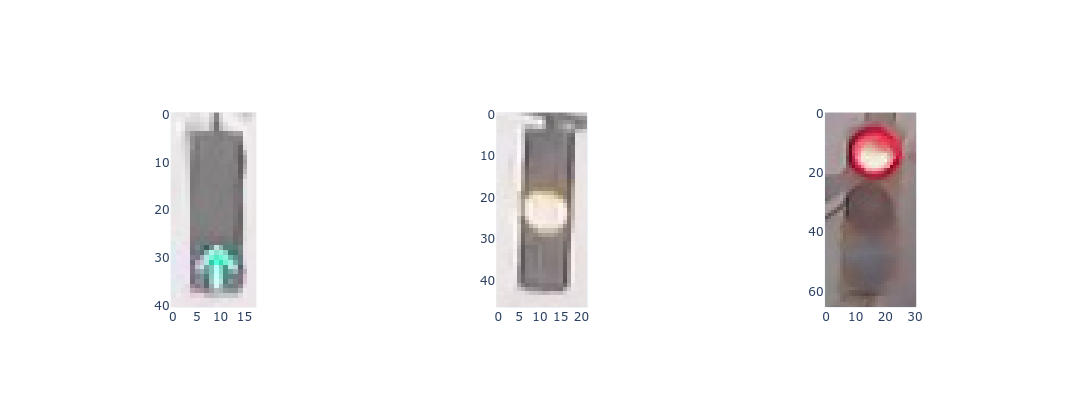

In [4]:
# Print images

print_images(df_train, 0, 1160, 790)


# Data Pre-processor

In [5]:
# Run Data Pre-Processor

df_train_pre = DataPreprocessor(img_size).run(df_train)

print(df_train_pre)

                                                    rgb
0     [[[235, 233, 234], [234, 232, 234], [234, 232,...
1     [[[90, 83, 83], [89, 82, 82], [88, 81, 81], [8...
2     [[[216, 217, 219], [213, 217, 218], [209, 217,...
3     [[[229, 233, 234], [232, 236, 237], [235, 239,...
4     [[[235, 233, 234], [235, 233, 234], [235, 232,...
...                                                 ...
1182  [[[234, 234, 234], [234, 234, 234], [233, 234,...
1183  [[[230, 230, 230], [229, 229, 229], [229, 229,...
1184  [[[139, 149, 159], [139, 149, 159], [139, 149,...
1185  [[[202, 196, 198], [166, 160, 162], [102, 96, ...
1186  [[[214, 215, 220], [215, 216, 221], [215, 216,...

[1187 rows x 1 columns]


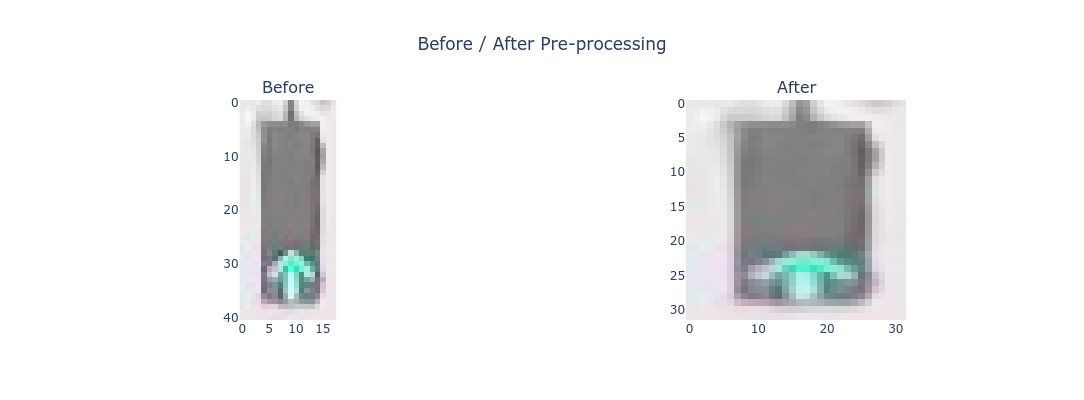

In [6]:
# Print one pre-processed image
                                   
rgb   = df_train["rgb"][0]                                             
print_pre_processed_image(rgb, img_size)


# Feature Extractor

In [7]:
# Run Feature Extractor

df_train_ft = FeatureExtractor(crop_left, crop_top).run(df_train_pre)
print(df_train_ft)

                         X1                     x1            X2                     x2
0     [17425, 15559, 22014]  [0.543, 0.485, 0.686]  [223, 0, 32]     [0.99, 0.0, 0.142]
1       [9783, 9275, 19215]  [0.417, 0.395, 0.819]    [1, 0, 67]      [0.015, 0.0, 1.0]
2      [13137, 7588, 17849]  [0.561, 0.324, 0.762]    [0, 0, 61]        [0.0, 0.0, 1.0]
3     [19073, 17129, 23006]  [0.554, 0.497, 0.668]    [0, 0, 65]        [0.0, 0.0, 1.0]
4     [17516, 15641, 23411]  [0.528, 0.472, 0.706]  [170, 3, 74]  [0.917, 0.016, 0.399]
...                     ...                    ...           ...                    ...
1182  [23776, 26152, 21608]  [0.574, 0.631, 0.522]   [114, 9, 0]    [0.997, 0.079, 0.0]
1183  [18798, 25156, 17372]  [0.524, 0.701, 0.484]  [236, 55, 0]    [0.974, 0.227, 0.0]
1184  [13587, 13771, 12651]  [0.588, 0.596, 0.547]    [84, 0, 0]        [1.0, 0.0, 0.0]
1185  [13447, 18923, 11477]  [0.519, 0.731, 0.443]  [117, 24, 0]     [0.98, 0.201, 0.0]
1186    [9358, 16613, 7186]  [0.

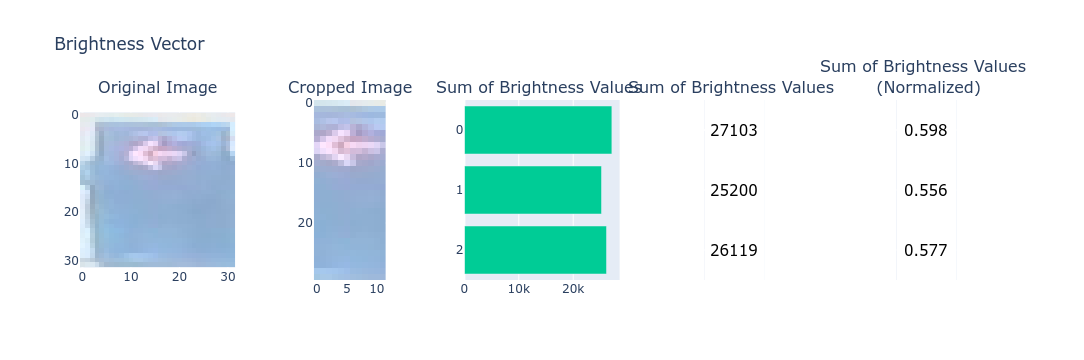

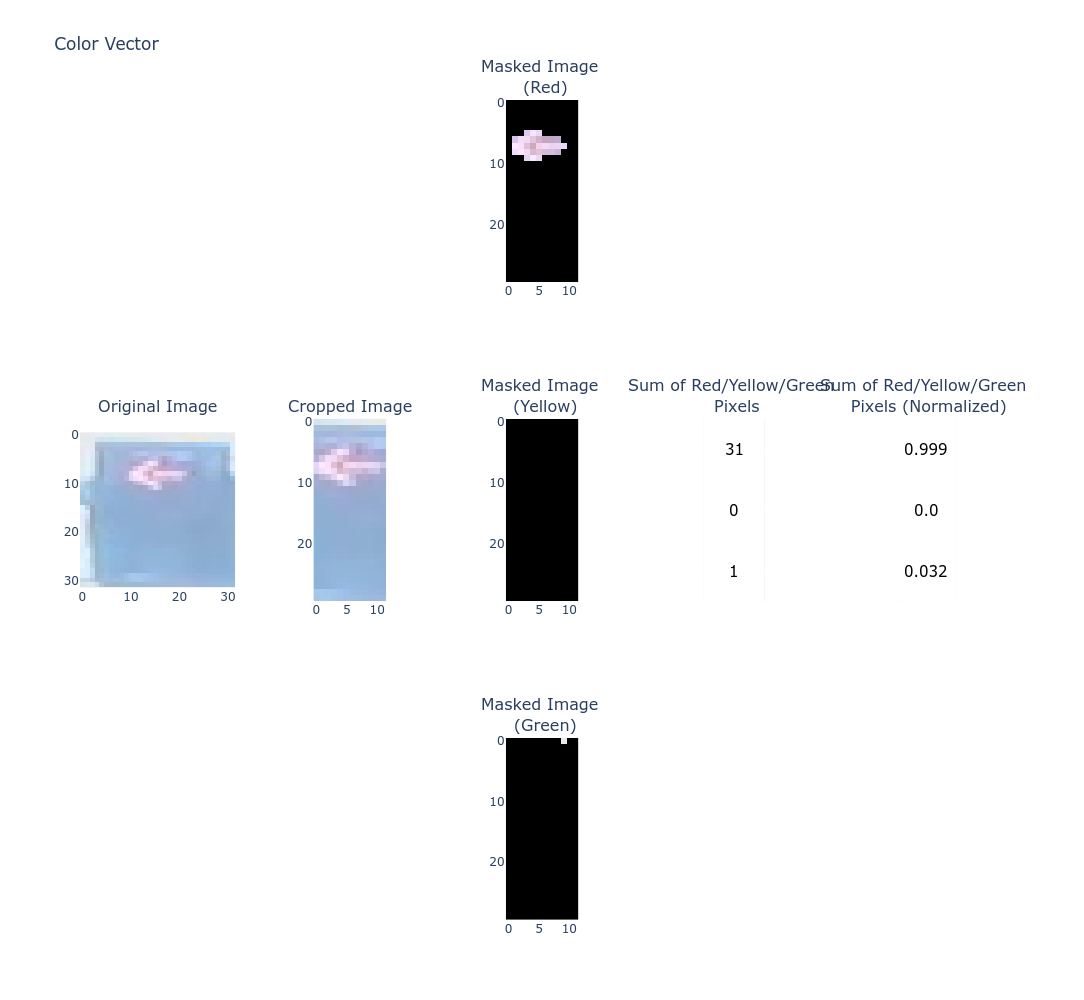

In [8]:
# Print features for one image

rgb = df_train_pre["rgb"][438]

print_brightness_vector(rgb, crop_left, crop_top)
print_color_vector(rgb, crop_left, crop_top)

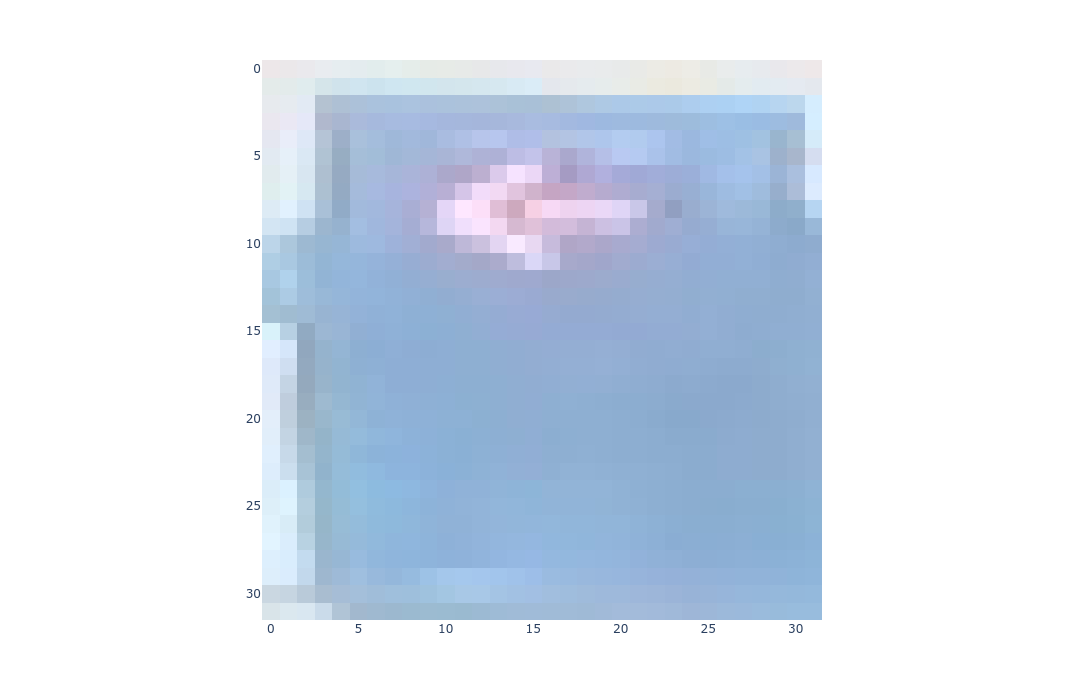

In [9]:
### Select coordinates of light pixels

# This cell was used for selecting pixel coordinates from standardized green, yellow and red lights.
# These pixel coordinates were then reported into file "pixels.csv"
# and reused later in this notebook for extracting traffic lights HSV color signatures.

fig = px.imshow(df_train_pre["rgb"][438])
fig.layout.height = 700

fig.show()


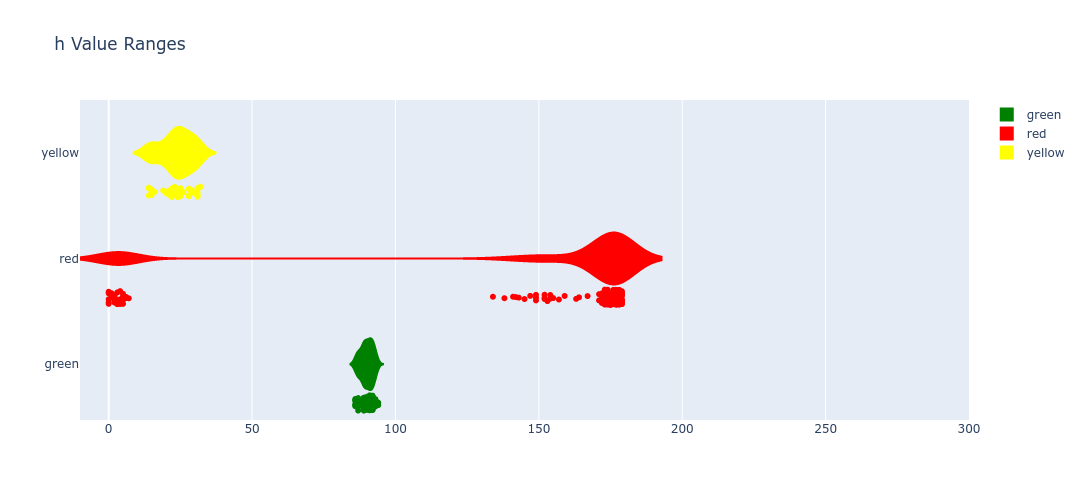

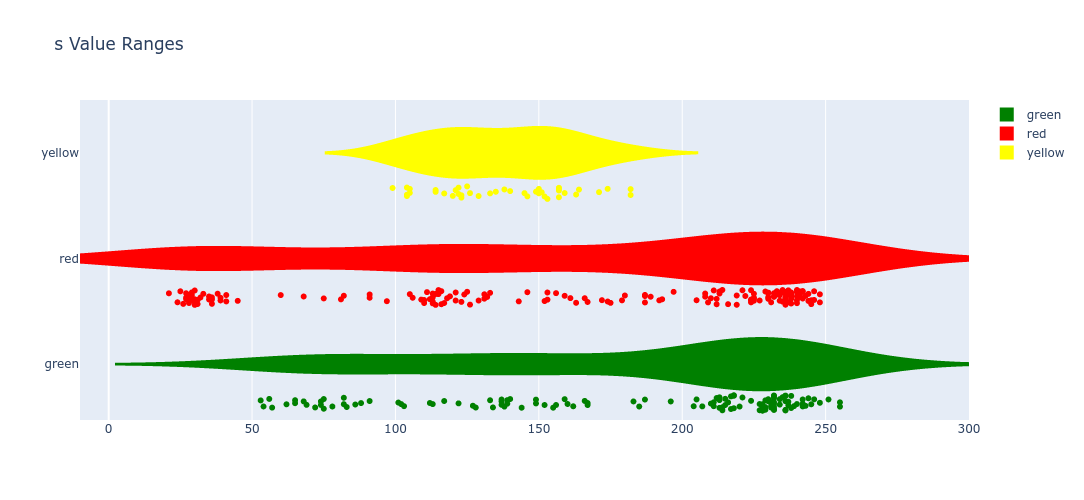

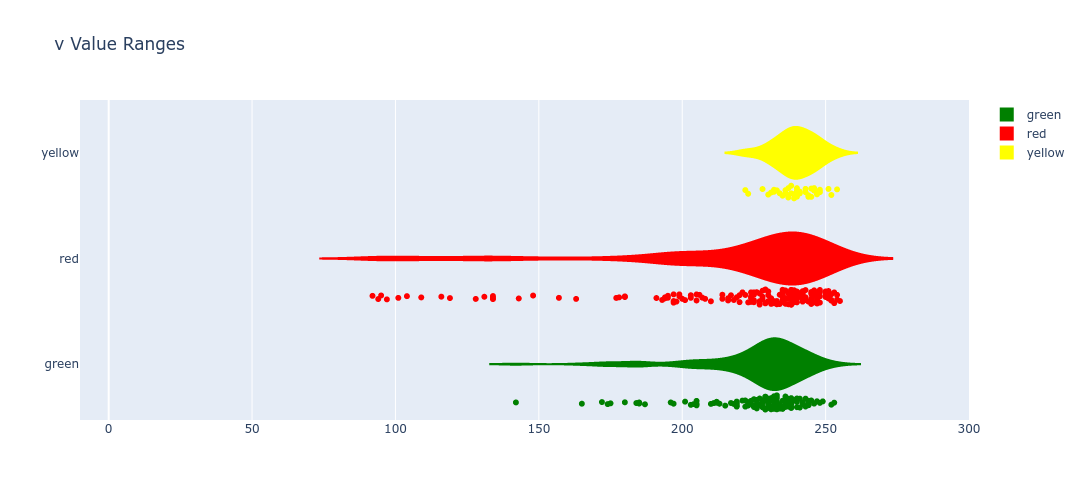

In [10]:
# Color HSV Value Ranges

# This cell shows violin charts of HSV color channels for the green-yellow-red pixels extracted above.
# Min/max values observed on these charts are used to apply color masks later on.   

plot_hsv_ranges(df_train_pre, "pixels.csv")


# Machine Learning Model

In [11]:
# Run Machine Learning Model

df_train_ml = MachineLearningModel(w1, w2).run(df_train_ft)
print(df_train_ml)


          y_hat
0     [1, 0, 0]
1     [0, 0, 1]
2     [0, 0, 1]
3     [0, 0, 1]
4     [1, 0, 0]
...         ...
1182  [1, 0, 0]
1183  [1, 0, 0]
1184  [1, 0, 0]
1185  [1, 0, 0]
1186  [0, 1, 0]

[1187 rows x 1 columns]


# Classifier

In [12]:
# Run Classifier

df_train_predictions = Classifier(img_size, crop_left, crop_top, w1, w2).run(df_train)

print(df_train_predictions)

          y_hat
0     [1, 0, 0]
1     [0, 0, 1]
2     [0, 0, 1]
3     [0, 0, 1]
4     [1, 0, 0]
...         ...
1182  [1, 0, 0]
1183  [1, 0, 0]
1184  [1, 0, 0]
1185  [1, 0, 0]
1186  [0, 1, 0]

[1187 rows x 1 columns]


# Evaluator

In [13]:
# Run Evaluator

true_labels      = df_train_true_labels["label"]
predicted_labels = df_train_predictions["y_hat"]

metrics = Evaluator().run(true_labels, predicted_labels)

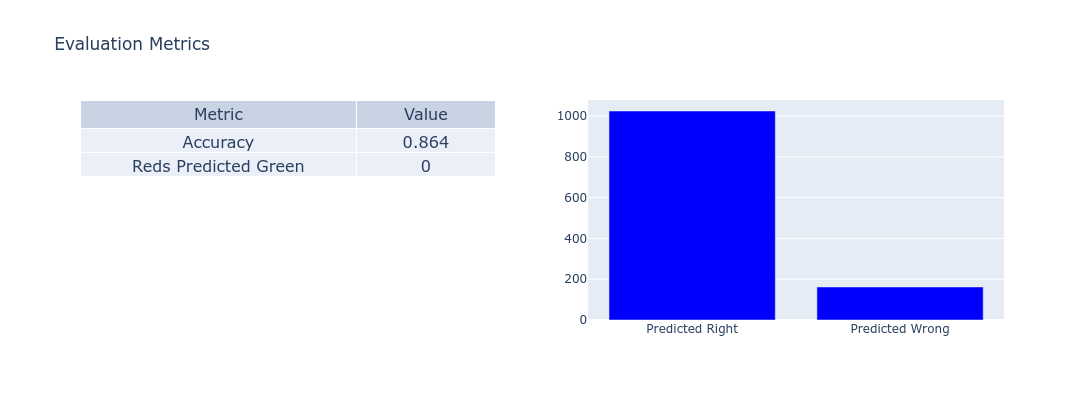

WRONG PREDICTIONS

     true_labels predicted_labels
0      [0, 0, 1]        [1, 0, 0]
4      [0, 0, 1]        [1, 0, 0]
5      [0, 0, 1]        [1, 0, 0]
8      [0, 0, 1]        [1, 0, 0]
9      [0, 0, 1]        [1, 0, 0]
...          ...              ...
1180   [0, 1, 0]        [1, 0, 0]
1182   [0, 1, 0]        [1, 0, 0]
1183   [0, 1, 0]        [1, 0, 0]
1184   [0, 1, 0]        [1, 0, 0]
1185   [0, 1, 0]        [1, 0, 0]

[162 rows x 2 columns]

RED LIGHTS CLASSIFIED AS GREEN

Empty DataFrame
Columns: [true_labels, predicted_labels]
Index: []


In [14]:
# Print metrics

print_metrics(metrics)    
    